# Análise de Churn de Clientes de Telecomunicações

## Introdução

Este notebook se concentra na análise de churn de clientes em uma empresa de telecomunicações. O churn de clientes refere-se à rotatividade de clientes, ou seja, quando um cliente deixa de utilizar os serviços de uma empresa. Entender os fatores que influenciam o churn é crucial para que as empresas possam desenvolver estratégias para reter seus clientes e, consequentemente, aumentar sua lucratividade.

## Descrição do Dataset

O dataset utilizado neste notebook é fornecido pela empresa de telecomunicações e contém informações sobre vários clientes, incluindo dados demográficos, informações de conta, serviços contratados e se o cliente deixou ou não a empresa. O objetivo da análise é prever se um cliente específico irá ou não cancelar seus serviços, com base nas características fornecidas.

### Informações das Colunas

Abaixo está uma breve descrição das colunas presentes no dataset:

1. **customerID**: Identificador único de cada cliente.
2. **gender**: Gênero do cliente (Male - Masculino, Female - Feminino).
3. **SeniorCitizen**: Indica se o cliente é idoso (1: Sim, 0: Não).
4. **Partner**: Indica se o cliente tem um parceiro (Yes - Sim, No - Não).
5. **Dependents**: Indica se o cliente possui dependentes (Yes - Sim, No - Não).
6. **tenure**: Número de meses que o cliente tem contrato com a empresa.
7. **PhoneService**: Indica se o cliente possui serviço de telefone (Yes - Sim, No - Não).
8. **MultipleLines**: Indica se o cliente possui múltiplas linhas telefônicas (Yes, No, No phone service).
9. **InternetService**: Tipo de serviço de internet do cliente (DSL, Fiber optic, No).
10. **OnlineSecurity**: Indica se o cliente possui serviço de segurança online (Yes, No, No internet service).
11. **OnlineBackup**: Indica se o cliente possui serviço de backup online (Yes, No, No internet service).
12. **DeviceProtection**: Indica se o cliente possui serviço de proteção de dispositivos (Yes, No, No internet service).
13. **TechSupport**: Indica se o cliente possui serviço de suporte técnico (Yes, No, No internet service).
14. **StreamingTV**: Indica se o cliente possui serviço de streaming de TV (Yes, No, No internet service).
15. **StreamingMovies**: Indica se o cliente possui serviço de streaming de filmes (Yes, No, No internet service).
16. **Contract**: Tipo de contrato do cliente (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Indica se o cliente usa fatura sem papel (Yes - Sim, No - Não).
18. **PaymentMethod**: Método de pagamento (Electronic check, Mailed check, Bank transfer, Credit card).
19. **MonthlyCharges**: Valor mensal cobrado do cliente.
20. **TotalCharges**: Valor total cobrado do cliente durante o período de contrato.
21. **Churn**: Indica se o cliente cancelou os serviços (Yes - Sim, No - Não).

## Objetivo da Análise

O objetivo principal desta análise é desenvolver um modelo de previsão que possa identificar os clientes que estão propensos a cancelar os serviços (churn) com base nas características fornecidas. Isso permitirá que a empresa de telecomunicações implemente estratégias de retenção e minimize a taxa de churn.

## Passos da Análise

1. **Carregar e Explorar os Dados**: Carregar o dataset e realizar uma análise exploratória para entender a distribuição dos dados e detectar possíveis anomalias ou valores ausentes.
2. **Pré-processamento dos Dados**: Tratar valores ausentes, converter variáveis categóricas em numéricas e normalizar os dados, se necessário.
3. **Análise Exploratória de Dados (EDA)**: Realizar visualizações para entender as relações entre diferentes características e o churn.
4. **Divisão dos Dados**: Dividir o dataset em conjuntos de treino e teste para validar o modelo de previsão.
5. **Construção de Modelos**: Aplicar algoritmos de machine learning, como K-Nearest Neighbors (KNN), para prever o churn.
6. **Avaliação do Modelo**: Avaliar o desempenho do modelo usando métricas de classificação, como acurácia, precisão, recall e matriz de confusão.
7. **Aprimoramento do Modelo**: Ajustar os parâmetros do modelo e testar diferentes algoritmos para melhorar a precisão da previsão.


A previsão do churn é um passo essencial para qualquer empresa de serviços, pois ajuda a entender os motivos que levam os clientes a abandonar os serviços e permite implementar ações proativas para melhorar a retenção. Com este notebook, os alunos aprenderão a lidar com dados de churn, realizar análise exploratória, aplicar técnicas de machine learning e avaliar a eficácia dos modelos de previsão.

---

In [ ]:
!rm -rf fiap-graduacao-iachatbot/

In [ ]:
!git clone https://github.com/FIAPON/fiap-graduacao-iachatbot.git

In [ ]:
%cd fiap-graduacao-iachatbot/

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Passo 1: Carregar o dataset
file_path = 'dados/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

In [3]:
# Passo 2: Explorar os dados
print("Informações do Dataset:")
print(data.info())
print("\nPrimeiros 5 registros:")
print(data.head())
print("\nResumo estatístico:")
print(data.describe())

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  


Distribuição de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


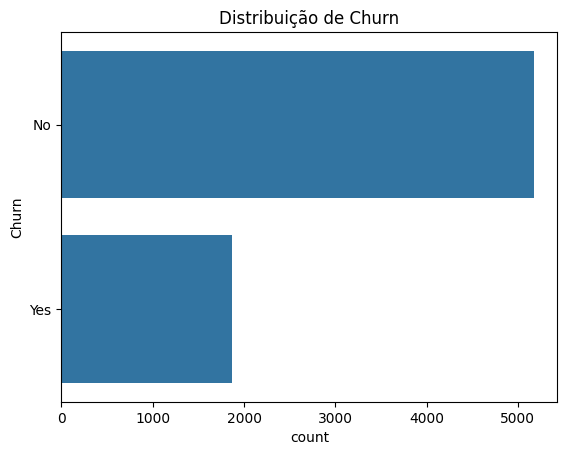

In [4]:
# Analisar a distribuição do churn
print("\nDistribuição de Churn:")
print(data['Churn'].value_counts())
sns.countplot(data['Churn'])
plt.title("Distribuição de Churn")
plt.show()

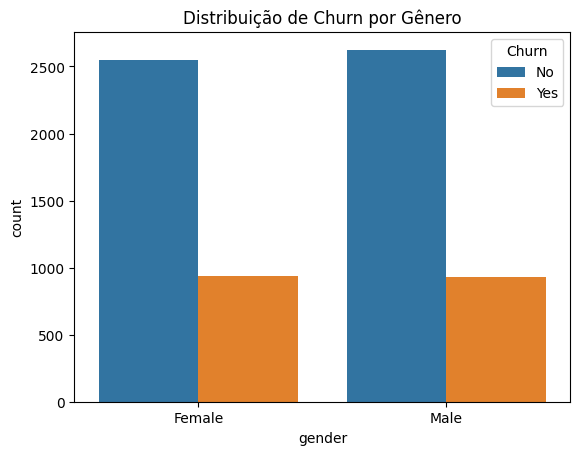

In [5]:
# Passo 3: Análise Exploratória de Dados (AED)
# Análise de Churn por gênero
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Distribuição de Churn por Gênero')
plt.show()

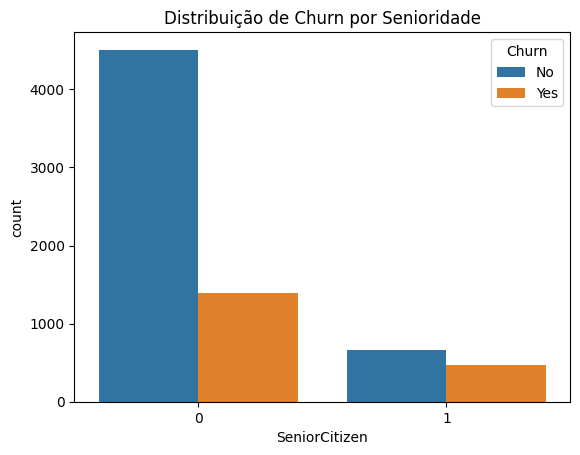

In [6]:
# Análise de Churn por senioridade
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Distribuição de Churn por Senioridade')
plt.show()

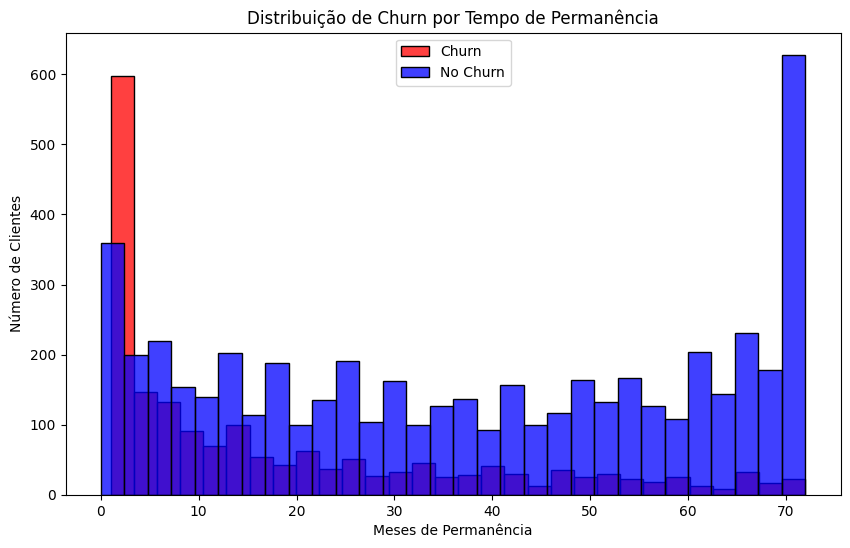

In [7]:
# Análise de Churn por tempo de permanência (tenure)
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Churn'] == 'Yes']['tenure'], kde=False, bins=30, color='red', label='Churn')
sns.histplot(data[data['Churn'] == 'No']['tenure'], kde=False, bins=30, color='blue', label='No Churn')
plt.title('Distribuição de Churn por Tempo de Permanência')
plt.xlabel('Meses de Permanência')
plt.ylabel('Número de Clientes')
plt.legend()
plt.show()

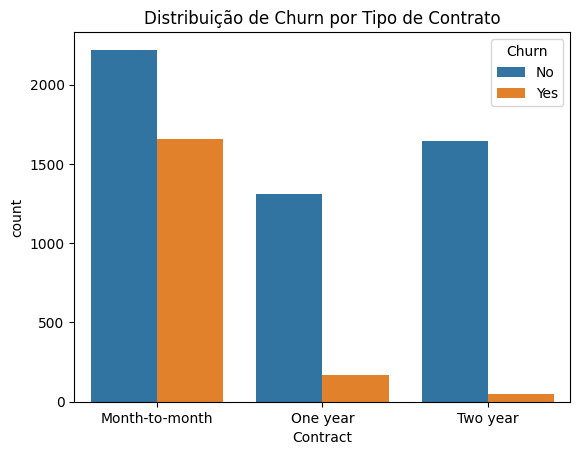

In [8]:
# Análise de Churn por tipo de contrato
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Distribuição de Churn por Tipo de Contrato')
plt.show()

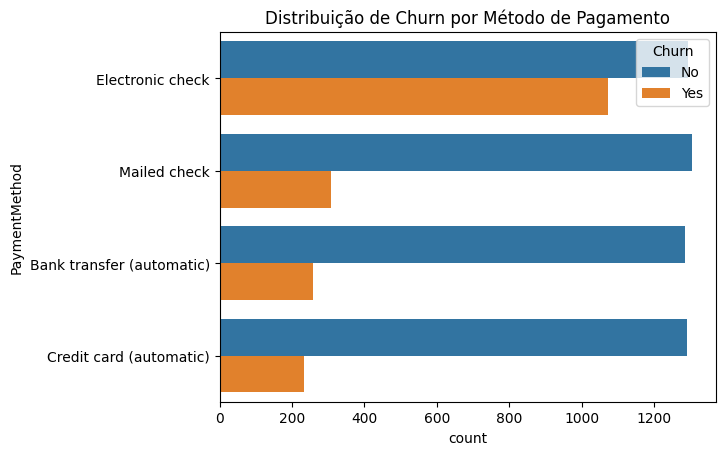

In [9]:
# Análise de Churn por método de pagamento
sns.countplot(y='PaymentMethod', hue='Churn', data=data)
plt.title('Distribuição de Churn por Método de Pagamento')
plt.show()

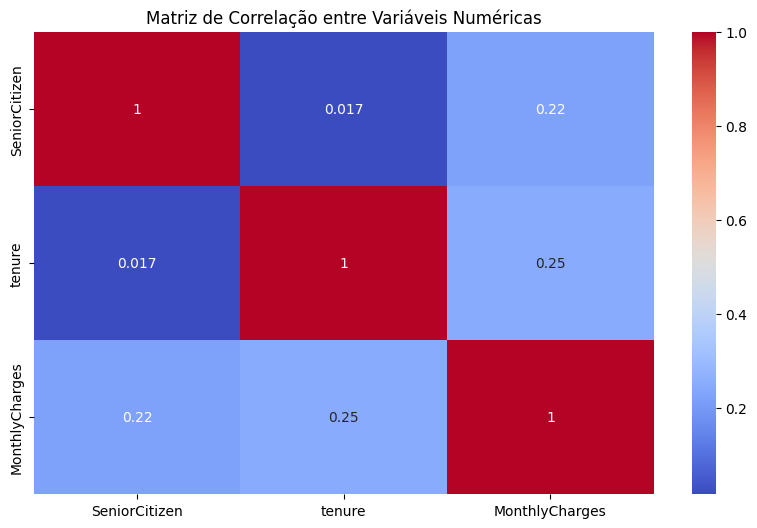

In [10]:
# Análise de correlação entre características numéricas
# Selecionar apenas colunas numéricas para calcular a correlação
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

In [11]:
# Passo 4: Pré-processamento dos dados
# Tratamento de valores ausentes
print("\nValores ausentes por coluna:")
print(data.isnull().sum())


Valores ausentes por coluna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
# Remover a coluna customerID, pois não é relevante para a análise
data = data.drop(columns=['customerID'])

In [13]:
# Converter a coluna 'TotalCharges' para numérica, removendo valores nulos
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Codificação de variáveis categóricas
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Normalização dos dados
scaler = StandardScaler()
X = data.drop(columns=['Churn'])
y = data['Churn']
X_scaled = scaler.fit_transform(X)

C:\Users\felip\AppData\Local\Temp\ipykernel_23648\728531756.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [15]:
# Passo 5: Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

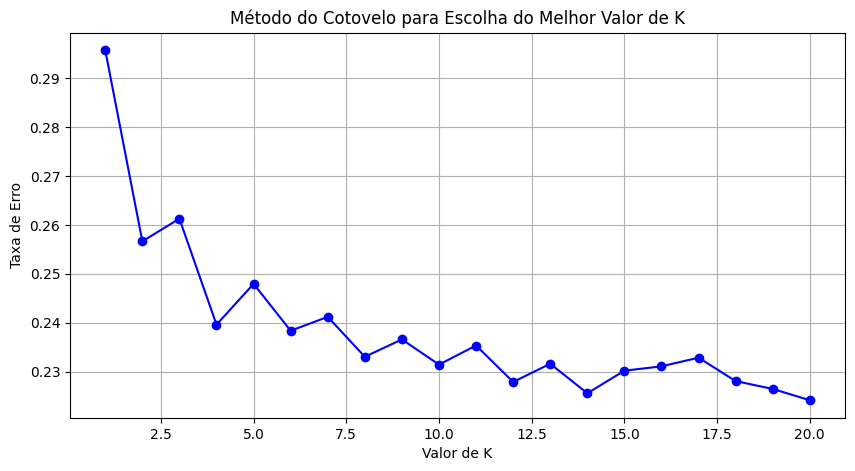

In [16]:
# Passo 6: Usar o Método do Cotovelo para encontrar o melhor valor de 'k'
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='blue')
plt.title('Método do Cotovelo para Escolha do Melhor Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.grid(True)
plt.show()

In [17]:
# Escolhendo o melhor valor de 'k' baseado no Método do Cotovelo
best_k = k_values[np.argmin(error_rates)]
print(f"O melhor valor de 'k' baseado no Método do Cotovelo é: {best_k}")

O melhor valor de 'k' baseado no Método do Cotovelo é: 20


In [18]:
# Passo 7: Treinando o modelo KNN com o melhor valor de 'k'
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

Acurácia do modelo KNN com k=20 no conjunto de teste: 0.79

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Matriz de Confusão:
[[917 119]
 [182 191]]


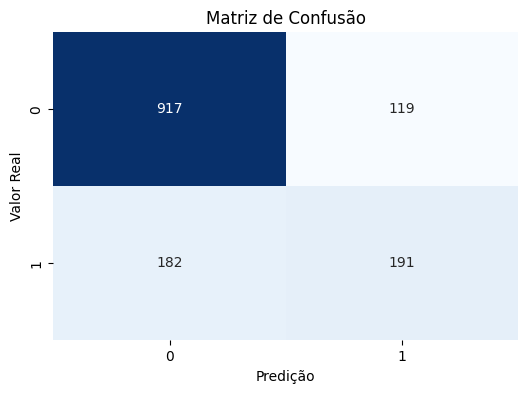

In [19]:
# Passo 8: Avaliação do modelo no conjunto de teste
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia do modelo KNN com k={best_k} no conjunto de teste: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Visualização da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()
